## Objective & Observation:

Objective:
 - Increasing the batch size to 64 to check if the model trains better
 - Adding Dropout of 0.1 after every convolution step instead of two 0.2 dropouts after each covolution block - to check if it addresses the overfitting problem better and the model is trained better  
 - Start the learning rate at 0.003 and decrease it after each epoch - 
Reason:  In all the previous model, the accuracy is inconsistent, it increases to 99.25 at 13th epoch and decreases and increases to 99.27 at 20th epoch. this is because of have same learning rate.



---


Observation:
- After increasing the batch size to 64
    - The model trained faster
    - There was no major change in the validation accuracy
- After adding Dropout of 0.1 
    - The accuracy improves and Test Accuracy of 99.40 is achieved
- After changing the learning rate to 0.003 and decreasing it after each epoch
    - Test Accuracy of 99.43 is achieved in 18th epoch

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization


from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [33]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

     |████████████████████████████████| 993kB 45.3MB/s 


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [35]:
!curl https://raw.githubusercontent.com/dexterfichuk/GoogleDriveCheckpoint/master/google_drive_checkpoint.py -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4522  100  4522    0     0  17459      0 --:--:-- --:--:-- --:--:-- 17459


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

*   Printing the number of data in X_train, dimension of each image and plotting the first image in X_train




(60000, 28, 28)


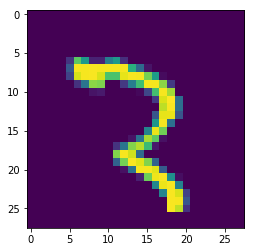

In [37]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[500])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

*   displays the first 10 output values in the output training dataset

In [40]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

* Converts each value in the output training and testing dataset into vector of dimension 1xnumber_of_classes
* The values in the vector will be 0. or 1. 
* Only one of the values in each vector will be 1, indicating the class to which the input data belongs to. Eg the first value in the y_train is 5, this will be converted into  [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]. 
* The 6th value in the vector will be 1 indicating class 5.
* The first value in the vector represents class 0, second value represents class 1 and so on.

* Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

* displays the first 10 output values in the output training dataset after conversion to vectors


In [42]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Training DNN Model

In [43]:
from keras.layers import Activation
from keras.regularizers import l2

model = Sequential()
activation = 'relu'

model.add(Convolution2D(8, 3, 3, input_shape=(28,28,1), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))) # 26, RF: 3
model.add(BatchNormalization())
model.add(Activation(activation))

# Convolution block 1
model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))) #24, RF: 5
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dropout(0.1))

model.add(Convolution2D(20, 3, 3, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))) #22, RF: 7
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dropout(0.1))

# model.add(Dropout(0.3))

# Transition block 1
model.add(MaxPooling2D(pool_size=(2, 2))) # 11, RF: 14
model.add(Convolution2D(8, 1, 1, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))) # 11, RF: 14
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dropout(0.1))


# Convolution block 2
model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))) #9, RF: 16
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dropout(0.1))

model.add(Convolution2D(20, 3, 3, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))) #7, RF: 18
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dropout(0.1))

# model.add(Dropout(0.3))

model.add(Convolution2D(10, 1, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))) #7, RF: 18
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Convolution2D(10, 7))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg...)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_23 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
activation_26 (Activation)   (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_24 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
activation_27 (Activation)   (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 24, 24, 16)        0         
__________

* Compiles the convolution model. 
* Compile method takes 3 parameters - loss, optimizer, metrics
* loss - lower the score, better the performance. value: categorical_crossentropy (commonly used)
* optimizer - controls the learning rate (determines how fast the optimal weights for the model are calculated)
* metrics - displays the accuracy metrics. indicates the accuracy of the trained model 

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

## Observation
- After increasing the batch size to 64
    - The model trained faster
    - There was no major change in the validation accuracy
- After adding Dropout of 0.1 
    - The accuracy improves and Test Accuracy of 99.40 is achieved
- After changing the learning rate to 0.003 and decreasing it after each epoch
    - Test Accuracy of 99.43 is achieved in 18th epoch



In [50]:
from google_drive_checkpoint import GoogleDriveCheckpoint
from keras.preprocessing.image import ImageDataGenerator

filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.h5"
checkpoint = GoogleDriveCheckpoint(filepath, drive, save_best_only=True, save_weights_only=True,
                                       verbose=1)

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

train_iterator = datagen.flow(X_train, Y_train, batch_size=64)
test_iterator = datagen.flow(X_test, Y_test, batch_size=64)


model.fit_generator(train_iterator, steps_per_epoch=64, epochs=40, validation_data=test_iterator, validation_steps=64, callbacks=[checkpoint, LearningRateScheduler(scheduler, verbose=1)])
# model.fit(X_train, Y_train, batch_size=64, nb_epoch=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
 7/64 [==>...........................] - ETA: 1s - loss: 0.2026 - acc: 0.9643

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


64/64 [==============================] - 1s 19ms/step - loss: 0.1819 - acc: 0.9685 - val_loss: 0.1584 - val_acc: 0.9768

Epoch 00001: val_loss improved from inf to 0.15836, saving model to weights-improvement-01-0.98.h5
Uploaded file weights-improvement-01-0.98-0.15835759474430233.h5 to drive with ID 11g7njzODaWCwwBhqLr2k1oVdiw1HQDN1
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
64/64 [==============================] - 1s 19ms/step - loss: 0.1615 - acc: 0.9731 - val_loss: 0.1805 - val_acc: 0.9648

Epoch 00002: val_loss did not improve from 0.15836
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
64/64 [==============================] - 1s 19ms/step - loss: 0.1633 - acc: 0.9702 - val_loss: 0.1380 - val_acc: 0.9775

Epoch 00003: val_loss improved from 0.15836 to 0.13797, saving model to weights-improvement-03-0.98.h5
Uploaded file weights-improvement-03-0.98-0.13796537531458813.h5 to drive with ID 1BQh_b_OSeb-K4

In [64]:
# score = model.evaluate(X_test, Y_test, verbose=0)
_, acc = model.evaluate_generator(test_iterator, steps=64, verbose=0)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [66]:
print(acc)

0.9883893280632411


* The trained model predicts the output for all the input dataset in X_test


In [0]:
y_pred = model.predict(X_test)
y_pred = np.argmax(np.round(y_pred),axis=1)

In [75]:
print(y_pred[:9])
print(y_test[:9])

[7 2 1 0 4 1 4 9 5]
[7 2 1 0 4 1 4 9 5]


[ 321  340  449  582  625  659  674  740  947 1014 1039 1044 1226 1232
 1247 1260 1393 1553 1621 1709 1737 1878 1901 2018 2035 2043 2129 2130
 2135 2293 2329 2414 2454 2462 2488 2597 2607 2654 2771 2836 2927 2939
 2953 3005 3060 3073 3225 3288 3384 3422 3441 3503 3520 3597 3767 3796
 3808 3838 3853 3926 3941 4078 4238 4284 4400 4500 4504 4536 4571 4639
 4699 4761 4807 5165 5937 5955 6555 6571 6576 6597 6625 6783 7216 8316
 8408 9015 9638 9642 9664 9679 9692 9729 9839 9850 9905]
Found 95 incorrect labels


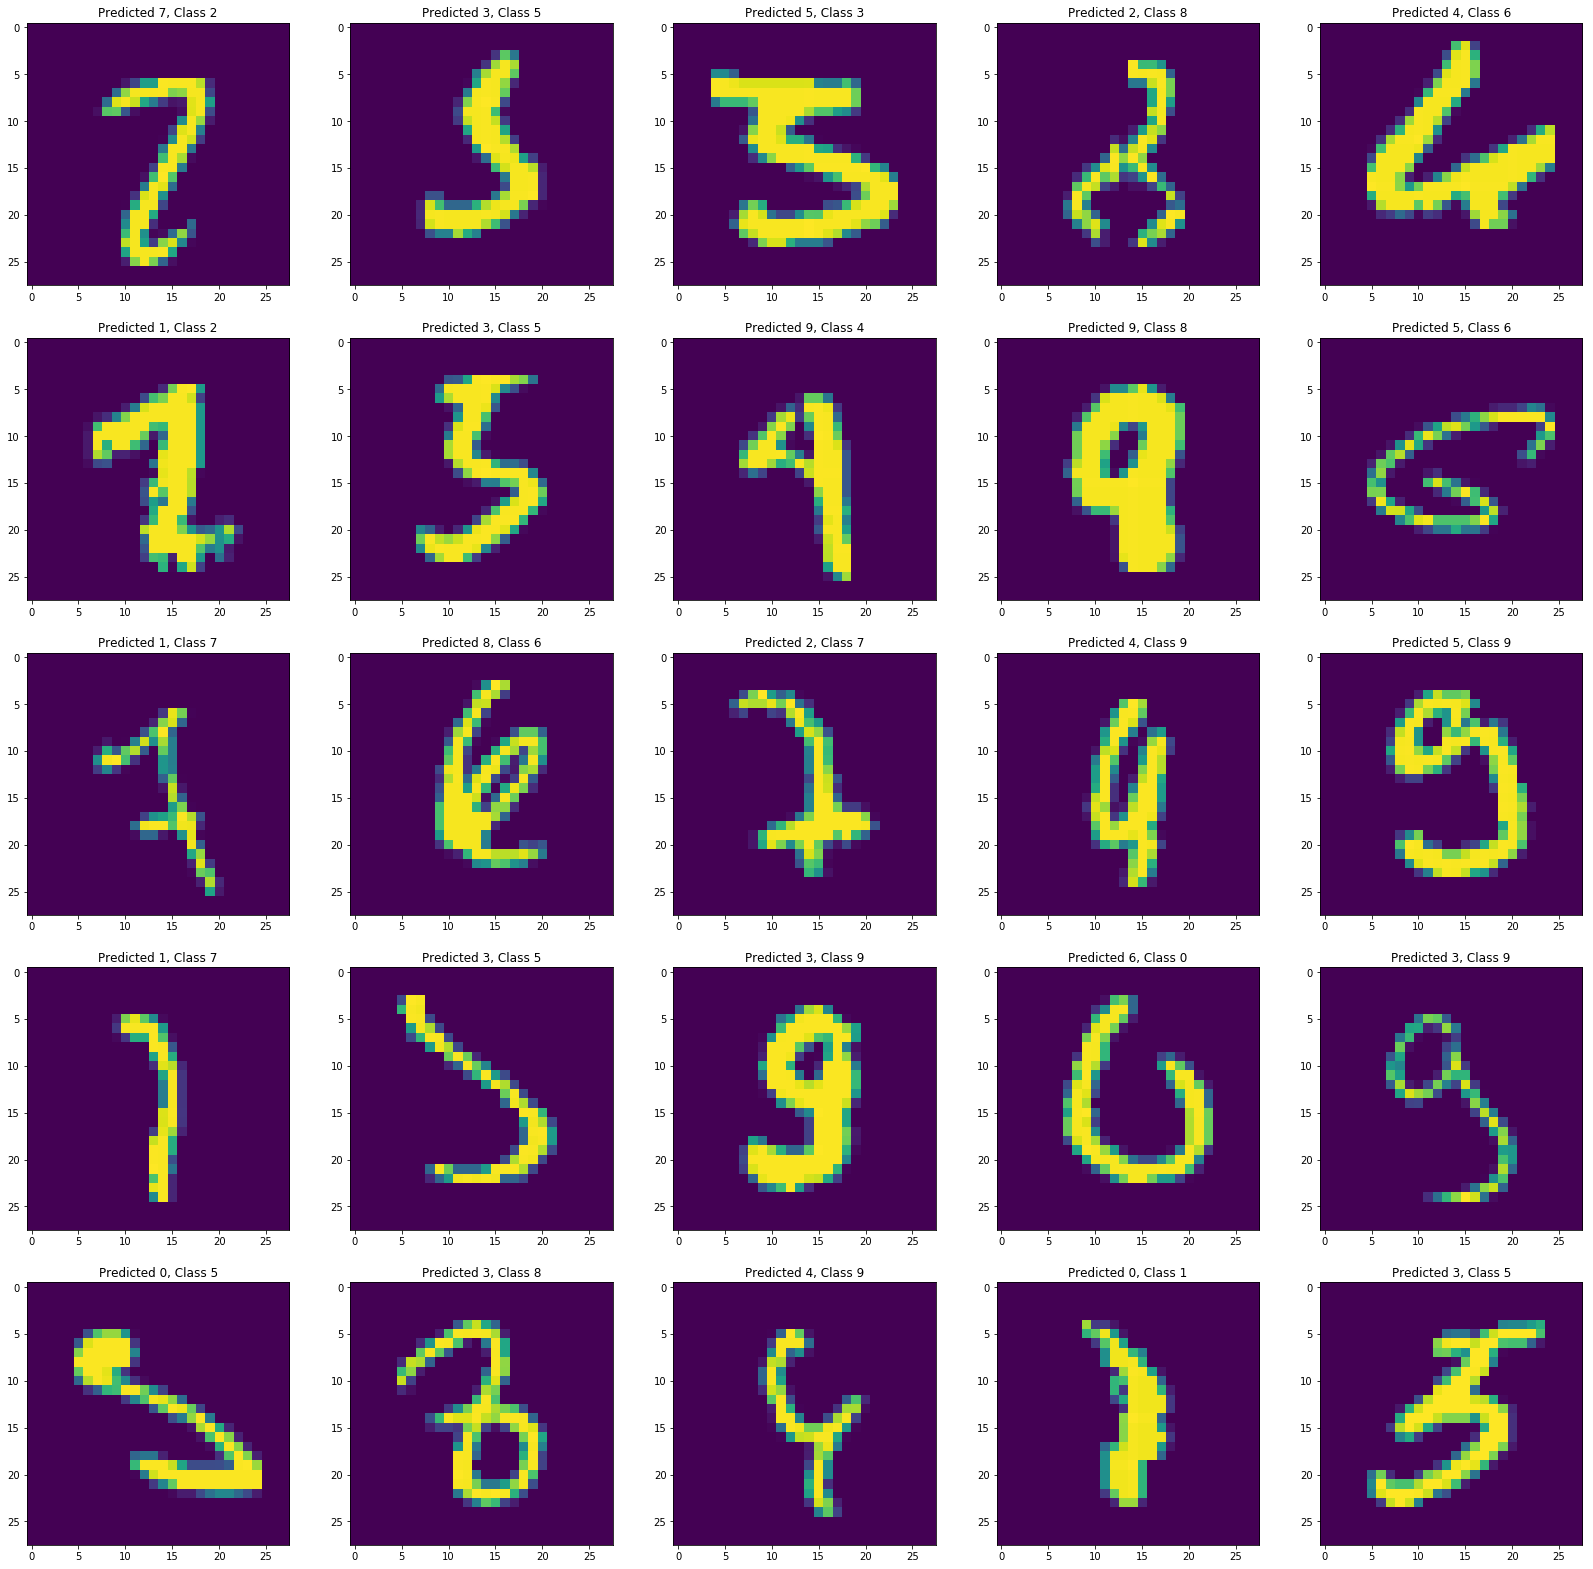

In [98]:
import numpy as np

incorrect = np.where(y_pred!=y_test)[0]

print(incorrect)
print("Found %s incorrect labels" % (len(incorrect)))

fig=plt.figure(figsize=(28, 28))
columns = 5
rows = 5
for i in range(1, 26):
  img_num = incorrect[i-1]
  img = X_test[img_num].reshape(28,28)
  fig.add_subplot(rows, columns, i)
  plt.imshow(img)
  plt.title("Predicted {}, Class {}".format(y_pred[img_num], y_test[img_num]))
plt.show()

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

IndexError: ignored

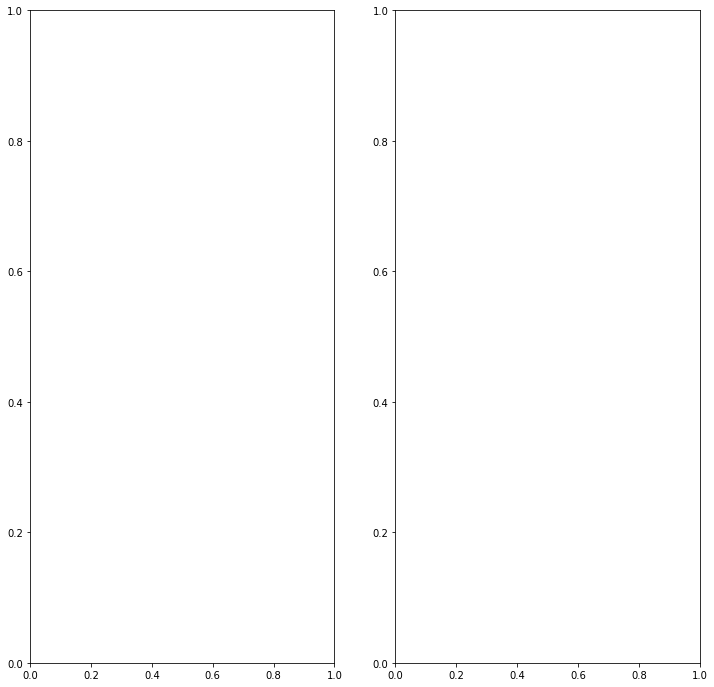

In [56]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_34'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()